In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
df = pd.read_csv('results/final/perf_exp_1.csv')
df.latency = df.latency * 10e-6
df.head()

,system_name,run_id,latency,operation,on_leader,n_nodes,n_clients,order_on_write
0,ordering_after_write_2_nodes_1_client,0,4.98183,write,False,2,1,False
1,ordering_after_write_2_nodes_1_client,0,4.43446,write,False,2,1,False
2,ordering_after_write_2_nodes_1_client,0,2.36459,read,True,2,1,False
3,ordering_after_write_2_nodes_1_client,0,1.48376,read,True,2,1,False
4,ordering_after_write_2_nodes_1_client,0,3.14846,write,True,2,1,False


In [39]:
agg_df = df.groupby(['system_name', 'operation', 'run_id', 'n_nodes', 'order_on_write']).latency.mean().reset_index()
agg_df["latency_factor"] = agg_df["latency"] / agg_df["n_nodes"]

In [40]:
print(agg_df.shape)
display(agg_df.head())

(160, 7)


,system_name,operation,run_id,n_nodes,order_on_write,latency,latency_factor
0,ordering_after_write_16_nodes_1_client,read,0,16,False,3.623201,0.226450
1,ordering_after_write_16_nodes_1_client,read,1,16,False,3.516554,0.219785
2,ordering_after_write_16_nodes_1_client,read,2,16,False,3.511593,0.219475
3,ordering_after_write_16_nodes_1_client,read,3,16,False,3.208024,0.200501
4,ordering_after_write_16_nodes_1_client,read,4,16,False,3.234404,0.202150


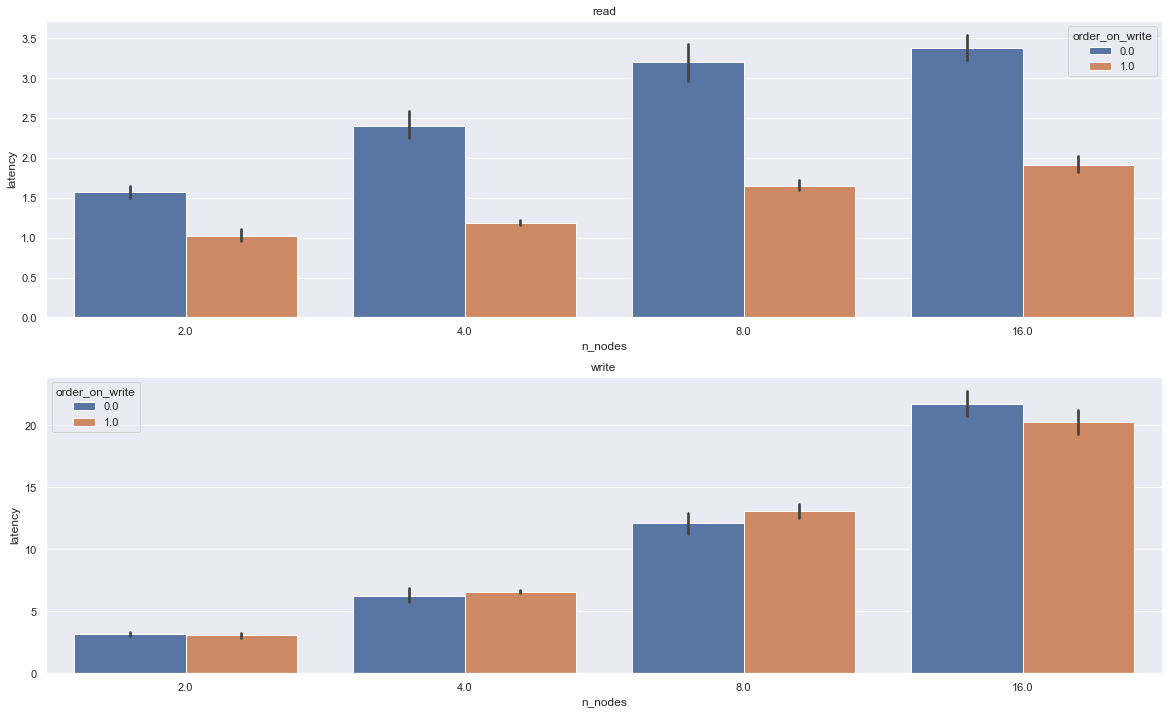

In [25]:
# ax = None
# for group, group_df in agg_df.groupby(['system_name', 'operation']):
#     label = f"order_on_write={group[0]}, operation={group[1]}"
#     ax = group_df.plot(x='n_nodes', y='speedup', figsize=(24, 6), ax=ax, label=label)

fig, axs = plt.subplots(2, 1, figsize=(20, 12))

idx = 0
for group, group_df in agg_df.groupby(['operation']):
    # display(group_df)
    axs[idx].set_title(group_df.iloc[0, 1])
    sns.barplot(ax=axs[idx], x='n_nodes', y='latency', hue="order_on_write", data=group_df)
    idx += 1


In [42]:
agg_df_leader = df.groupby(['system_name', 'operation', 'run_id', 'n_nodes', 'order_on_write', 'on_leader']).latency.mean().reset_index()
agg_df_leader["latency_factor"] = agg_df_leader["latency"] / agg_df_leader["n_nodes"]

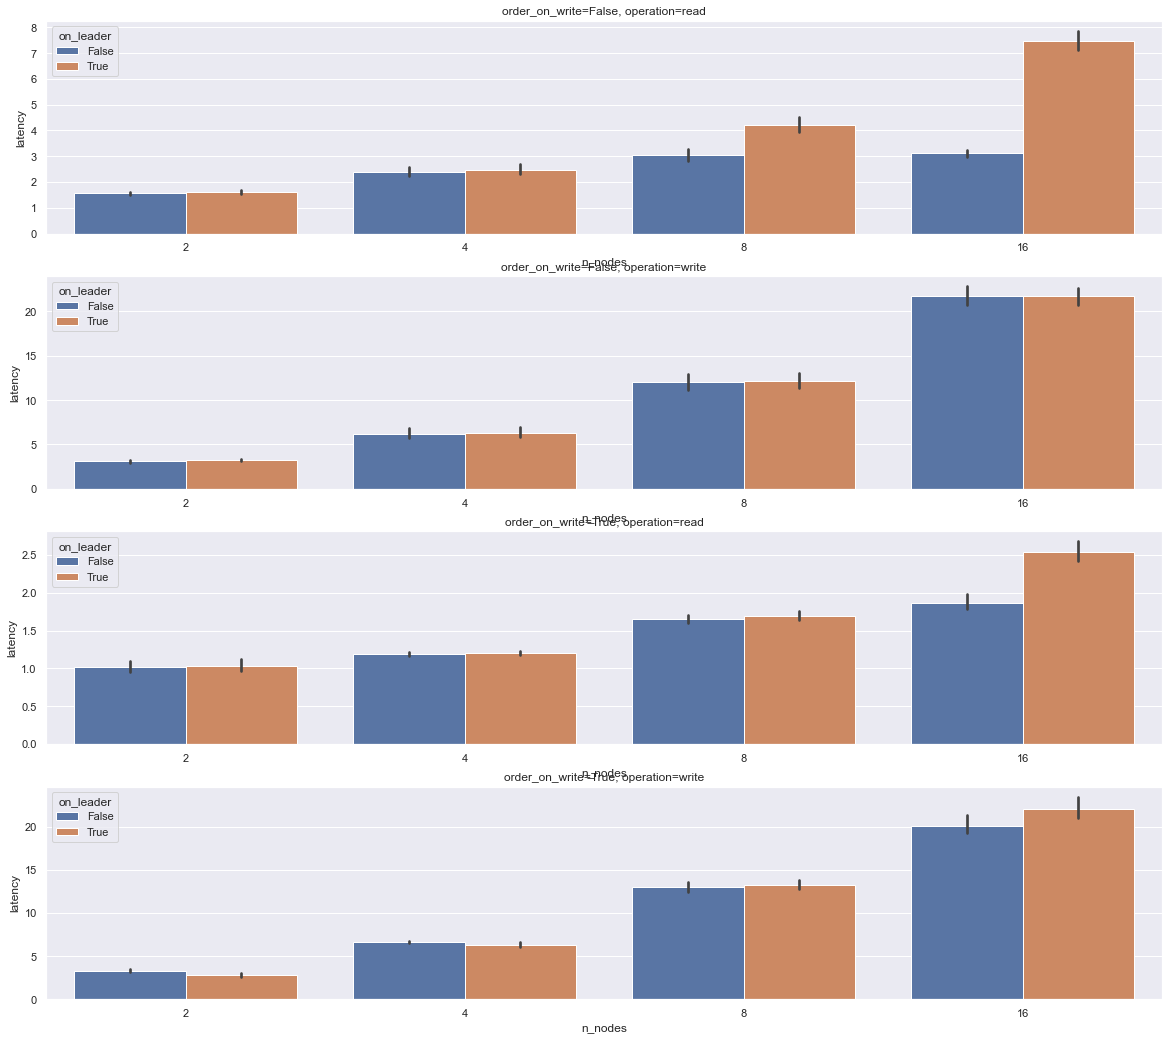

In [47]:
fig, axs = plt.subplots(4, 1, figsize=(20, 18))

idx = 0
for group, group_df in agg_df_leader.groupby(["order_on_write", 'operation']):
    # display(group_df)
    # axs[idx].set_title(group_df.iloc[0, 1])
    axs[idx].set_title(f"order_on_write={group[0]}, operation={group[1]}")
    sns.barplot(ax=axs[idx], x='n_nodes', y='latency', hue="on_leader", data=group_df)
    idx += 1

In [ ]:
# def speedup(sub_df):
#     two_nodes_df = sub_df[sub_df["n_nodes"] == 2]
#     sub_df["speedup"] = sub_df["latency"] / two_nodes_df["latency"].values
#     return sub_df
#
# agg_df_with_speedup = agg_df.groupby(['order_on_write', 'operation']).apply(speedup)

# fig = ax.get_figure()
# fig.savefig('results/figures/order_before_vs_after_write.pdf')